In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/my-images/angry.png
/kaggle/input/my-images/memeboy.png
/kaggle/input/my-images/me_and_cat.jpg
/kaggle/input/my-images/notsmile.png
/kaggle/input/my-images/photo_2023-06-12_15-09-06.jpg
/kaggle/input/my-images/dramatic.jpg
/kaggle/input/my-images/hamster.jpg
/kaggle/input/my-images/photo_2023-06-12_15-09-10.jpg
/kaggle/input/my-images/yall.png
/kaggle/input/my-images/chu_vanin.jpg
/kaggle/input/my-images/mesad.jpg
/kaggle/input/my-images/repeat.png
/kaggle/input/my-images/smile.png
/kaggle/input/my-images/meangry.jpg
/kaggle/input/my-images/photo_2023-06-12_15-08-36.jpg
/kaggle/input/my-images/dog.jpg
/kaggle/input/my-images/cat_back.jpg
/kaggle/input/my-images/me.jpg
/kaggle/input/my-images/photo_2023-06-12_15-09-14.jpg
/kaggle/input/my-images/cat_hands.jpg
/kaggle/input/my-images/oposum.jpg
/kaggle/input/my-images/photo_2023-05-16_23-47-10.jpg
/kaggle/input/my-images/anime.jpg
/kaggle/input/my-images/memactor.png
/kaggle/input/my-images/test_cat_image.jpg
/kaggle/input/

In [2]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

# Завантаження даних

In [3]:
import h5py
test = h5py.File("../input/happy-house-dataset/test_happy.h5", "r")
train = h5py.File("../input/happy-house-dataset/train_happy.h5", "r")

1


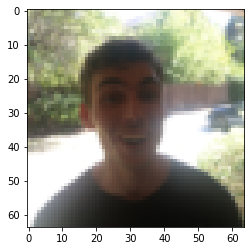

In [4]:
from random import randint
index = randint(0, 599)
imshow(train['train_set_x'][:][index, :, :, :]);
print(train['train_set_y'][index])

# Нормалізація даних

In [5]:
train_x_orig = np.array(train['train_set_x'][:])
train_y_orig = np.array(train['train_set_y'][:])
test_x_orig = np.array(test['test_set_x'][:])
test_y_orig = np.array(test['test_set_y'][:])

print(train_x_orig.shape)
print(train_y_orig.shape)
print(test_x_orig.shape)
print(test_y_orig.shape)

#Flatten the image
train_x = train_x_orig/255
test_x = test_x_orig/255

#Reshape train_y_orig and test_y_orig
train_y = train_y_orig.reshape(1,train_y_orig.shape[0]).T
test_y = test_y_orig.reshape(1,test_y_orig.shape[0]).T

print("Number of training example " +str(train_x.shape[0]))
print("Number of test example " +str(test_x.shape[0]))
print("train_X shape "+str(train_x.shape))
print("train_Y shape "+str(train_y.shape))
print("test_X shape "+str(test_x.shape))
print("test_Y shape "+str(test_y.shape))

(600, 64, 64, 3)
(600,)
(150, 64, 64, 3)
(150,)
Number of training example 600
Number of test example 150
train_X shape (600, 64, 64, 3)
train_Y shape (600, 1)
test_X shape (150, 64, 64, 3)
test_Y shape (150, 1)


# Побудова моделі

In [6]:
def model(input_shape):
    """
    input_shape: The height, width and channels as a tuple.  
        Note that this does not include the 'batch' as a dimension.
        If you have a batch like 'X_train', 
        then you can provide the input_shape using
        X_train.shape[1:]
    """
 
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)
 
    X = ZeroPadding2D((3, 3))(X_input)
    
    X = Conv2D(32, (5, 5), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
 
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
 
    return model

In [7]:
happyModel = model(train_x.shape[1:])

In [8]:
happyModel.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [9]:
happyModel.fit(x = train_x, y = train_y, epochs = 40, batch_size = 16)

Epoch 1/40
38/38 [==============================] - 3s 50ms/step - loss: 2.4942 - accuracy: 0.6141
Epoch 2/40
38/38 [==============================] - 2s 45ms/step - loss: 0.2366 - accuracy: 0.8963
Epoch 3/40
38/38 [==============================] - 2s 47ms/step - loss: 0.2383 - accuracy: 0.9048
Epoch 4/40
38/38 [==============================] - 2s 47ms/step - loss: 0.1485 - accuracy: 0.9650
Epoch 5/40
38/38 [==============================] - 2s 46ms/step - loss: 0.1071 - accuracy: 0.9624
Epoch 6/40
38/38 [==============================] - 2s 47ms/step - loss: 0.1420 - accuracy: 0.9570
Epoch 7/40
38/38 [==============================] - 2s 47ms/step - loss: 0.0579 - accuracy: 0.9781
Epoch 8/40
38/38 [==============================] - 2s 47ms/step - loss: 0.1126 - accuracy: 0.9687
Epoch 9/40
38/38 [==============================] - 2s 47ms/step - loss: 0.0577 - accuracy: 0.9770
Epoch 10/40
38/38 [==============================] - 2s 46ms/step - loss: 0.0564 - accuracy: 0.9909
Epoch 11/

In [10]:
preds = happyModel.evaluate(x = test_x, y = test_y)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/5 [==============================] - 0s 23ms/step - loss: 0.0917 - accuracy: 0.9733

Loss = 0.091691754758358
Test Accuracy = 0.9733333587646484


In [11]:
happyModel.summary()

Model: "HappyModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 66, 66, 32)        2432      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 66, 66, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 66, 66, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 33, 33, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 34848)             0

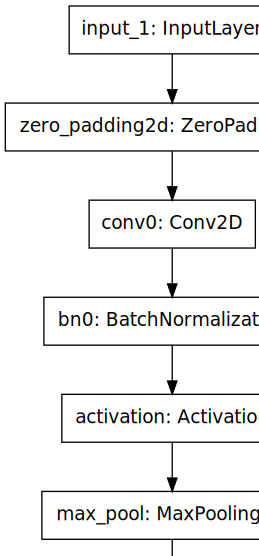

In [12]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))

# Тест вашої картинки

1.0


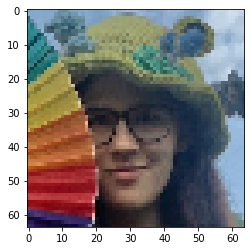

In [13]:
img_path = '../input/my-images/me.png'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x)[0][0])

1.0


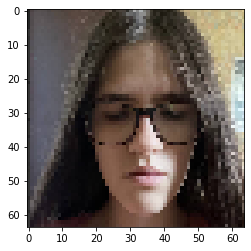

In [14]:
img_path = '../input/my-images/mesad.jpg'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x)[0][0])

1.0


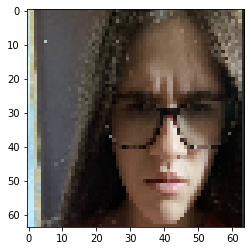

In [15]:
img_path = '../input/my-images/meangry.jpg'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x)[0][0])

1.0


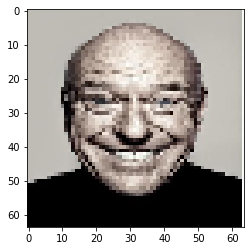

In [16]:
img_path = '../input/my-images/smile.png'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x)[0][0])

1.0


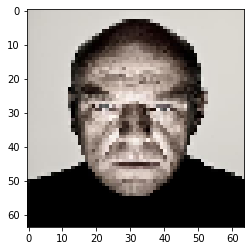

In [17]:
img_path = '../input/my-images/notsmile.png'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x)[0][0])

0.0


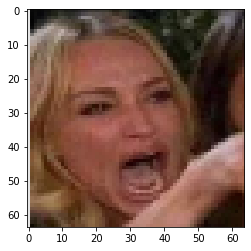

In [18]:
img_path = '../input/my-images/yall.png'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x)[0][0])

1.0


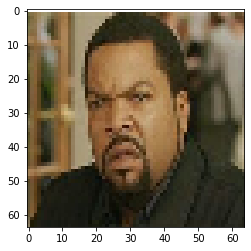

In [19]:
img_path = '../input/my-images/angry.png'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x)[0][0])

0.0


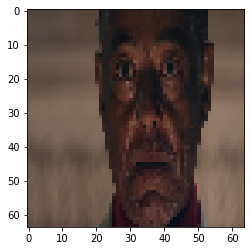

In [20]:
img_path = '../input/my-images/dramatic.jpg'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x)[0][0])

1.0


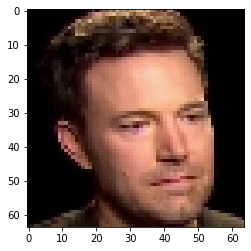

In [21]:
img_path = '../input/my-images/sad.png'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x)[0][0])

0.0


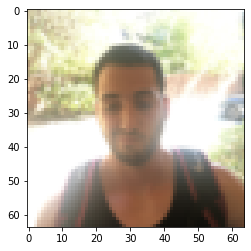

In [22]:
img_path = '../input/my-images/repeat.png'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x)[0][0])

1.0


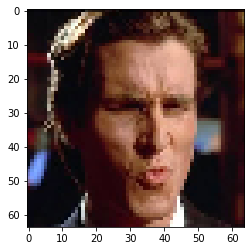

In [23]:
img_path = '../input/my-images/memactor.png'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x)[0][0])